# 035

Named after this: https://www.youtube.com/watch?v=hgZFuq2S15A
        
This code is designed to mimic the way the retina works in identifying parts of images, etc. 

The code is designed entirely to respond to MNIST sized data in order to get the respective neurons working,
it is not designed to learn from this data (at least at this point). MNIST data seemed an appropriate level
of complexity and size to get a small number of neurons working together.

### Setup the environment

In [1]:
import numpy as np
from mnist import MNIST   
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Create a sample image to work with

TODO: Flesh this out into a data pipeline later

In [15]:
mndata = MNIST('./mnist')
images, labels = mndata.load_training()

def get_next_image(index=0):
    return images[index]
    

* Get an image from the training set

In [17]:
image = get_next_image(index=0)
print(mndata.display(image))


............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


* Convert to a numpy array so we can process it easier / better

In [33]:
image=np.asarray(image).reshape((28,28))
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Convolve the image...

* Step across the image, creating a series of mini-matrices that can be used to feed into the retinal neurons

In [67]:
stride = (4,2)   # This will be 5 on-centre neurons, 2 surround (off-centre) neurons
stride_size = stride[0] + stride[1]
len_x, len_y = image.shape
x_count, x_max = 1, int((len_x - stride_size)/stride[0])+1
y_count, y_max = 1, int(1) 
print ('Convolution Dimensions: x={} / y={}, starting at x={}, y={}'.format(x_max, y_max, x_count, y_count))

Convolution Dimensions: x=6 / y=1, starting at x=1, y=1


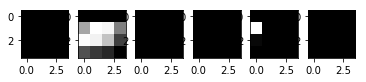

In [69]:
fig = plt.figure() #int(x_max+1) * int(y_max+1))

for y in range (0, len_y - stride_size, stride[0]):
    x_count = 1
    for x in range(0, len_x - stride_size, stride[0]):
        #print ('Rendering kernel {}/{} at plot {}/{}'.format(y, x, y_count, x_count))

        x_end = x + stride[0]
        y_end = y + stride[0]
        kernel = image[x:x_end, y:y_end]
        #orientation = s1(kernel)
        a = fig.add_subplot(y_max, x_max, y_count*x_max+x_count)
        plt.imshow(kernel, cmap="gray")    
        x_count += 1
    y_count += 1
plt.show()    